In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## Clean and Preprocess Data

In [2]:
# Merge 12 months data
path = '/Users/nthie/Desktop/Getting_Knowing_Data/Sale Report 2019/'
os.listdir(path)   #type(os.listdir(path))  --> a list

['.ipynb_checkpoints',
 'annualSale2019Report.csv',
 'annualSales2019.csv',
 'DS_Store',
 'sales2019_1.csv',
 'sales2019_10.csv',
 'sales2019_11.csv',
 'sales2019_12.csv',
 'sales2019_2.csv',
 'sales2019_3.csv',
 'sales2019_4.csv',
 'sales2019_5.csv',
 'sales2019_6.csv',
 'sales2019_7.csv',
 'sales2019_8.csv',
 'sales2019_9.csv',
 'Sale_Report .ipynb']

In [3]:
path = '/Users/nthie/Desktop/Getting_Knowing_Data/Sale Report 2019/'
dframes = [] 
all_length = []
for file in os.listdir(path):
    if file.endswith('.csv'):
        filepath = path + file           # get filepath with only .csv
        df1 = pd.read_csv(filepath)      # read each dataframe of the filepath
        dframes.append(df1)              # append each dataframe to a list of dataframe
        result=pd.concat(dframes)        # concat each dataframe into one dataframe
        length_1month = len(df1.index)
        all_length.append(length_1month)
df = result
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [4]:
print(sum(all_length))

4484400


In [5]:
df.to_csv('annualSale2019Report.csv', index =False)

In [6]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [7]:
##--> Add 'Month'column
df['Month'] = df['Order Date'].str.slice(0,2,1)   ##slice substring from a string str.slice(start, stop, step)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [8]:
print(set(df['Month']))   ##(set()) check unique values of Months to see if there are any invalid values

{nan, '01', 'Or', '08', '04', '05', '07', '09', '06', '03', '12', '02', '10', '11'}


In [9]:
## get rid of 'NaN' and 'or'
df = df.dropna(how='all')
df = df[df['Month'] != 'Or']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [10]:
print(df['Quantity Ordered'], df['Price Each'])  # need to convert these objects to a numaric in order to calculate Total Sale

0        1
1        1
2        2
3        1
4        1
        ..
11681    3
11682    1
11683    1
11684    1
11685    1
Name: Quantity Ordered, Length: 4462800, dtype: object 0           700
1         14.95
2         11.99
3        149.99
4         11.99
          ...  
11681      2.99
11682       700
11683       700
11684    379.99
11685     11.95
Name: Price Each, Length: 4462800, dtype: object


In [11]:
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"], downcast='integer')
df["Price Each"] = pd.to_numeric(df["Price Each"], downcast='float')

df['Sale']=df['Quantity Ordered']*df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale
0,141234,iPhone,1,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.000000
1,141235,Lightning Charging Cable,1,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.950000
2,141236,Wired Headphones,2,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.980000
3,141237,27in FHD Monitor,1,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.990005
4,141238,Wired Headphones,1,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.990000


## Reporting

### What was the best month for sales?  How much was earned that month?

In [12]:
move_Salecolum = df.pop('Sale')       #cut Sale column out of dataframe
df.insert(4, 'Sale', move_Salecolum)  #then insert it to an expected location
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sale,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [13]:
df.groupby('Month').sum()['Sale']   #group Month column to see how much total sale each month

Month
01     43734160.0
02     52848536.0
03     67370408.0
04     81376088.0
05     75662560.0
06     61867252.0
07     63546616.0
08     53867228.0
09     50341444.0
10     89681448.0
11     76790480.0
12    110722640.0
Name: Sale, dtype: float32

In [14]:
sales_values = df.groupby('Month').sum()['Sale']
sales_values.max()

110722640.0

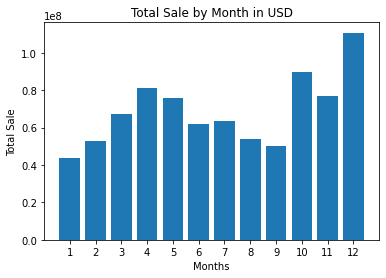

In [15]:
## Visualize by bar chart 
months = range(1,13)
plt.bar (months,height=sales_values)
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Total Sale')
plt.title('Total Sale by Month in USD')
plt.show()

### What city has the best sale?

In [16]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sale,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [17]:
address_to_city = lambda address:address.split(',')[1]       #get city from Purchase Address 
df['City']=df['Purchase Address'].apply(address_to_city)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sale,Order Date,Purchase Address,Month,City
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,Boston
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,Portland
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,San Francisco
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,Los Angeles
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,Austin


In [18]:
df.groupby('City').sum()['Sale']

City
 Atlanta           67091964.0
 Austin            43669960.0
 Boston            87879408.0
 Dallas            66431408.0
 Los Angeles      130861696.0
 New York City    111943616.0
 Portland          55691776.0
 San Francisco    198292896.0
 Seattle           65946132.0
Name: Sale, dtype: float32

In [19]:
sale_value_city = df.groupby('City').sum()['Sale']
sale_value_city.max()

198292896.0

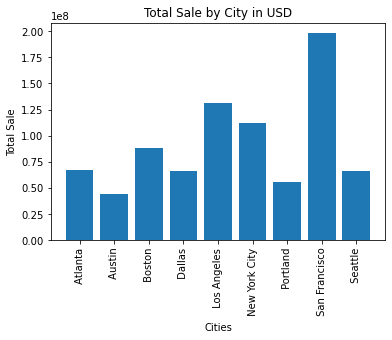

In [20]:
## Visualize by bar chart 
cities = [city for city, sale in sale_value_city.items()]
plt.bar (cities,height=sale_value_city)
plt.xticks(cities, rotation = 90, )
plt.xlabel('Cities')
plt.ylabel('Total Sale')
plt.title('Total Sale by City in USD')
plt.show()

In [21]:
### What time should we display ads to maximize the likelihood of customer's buying product?

In [22]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sale,Order Date,Purchase Address,Month,City
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,Boston
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,Portland
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,San Francisco
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,Los Angeles
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,Austin
